In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

import pulp

print(pulp.__version__)

In [3]:
from pulp import *

In [4]:
import pandas as pd

Zadanie polega na stworzeniu grafiku dla 6 osób które posiadają konkretne ograniczenia dostępności w poszególne dni. Każda osoba posiada również swoją konkretną stawkę godzinową. Naszym zadaniem jest stworzenie grafiku w taki sposób aby zapewnić minimalne zapotrzebowanie na pracowników w danych dniach i jak najbardziej ograniczyć koszty związane z zatrudnieniem pracowników.
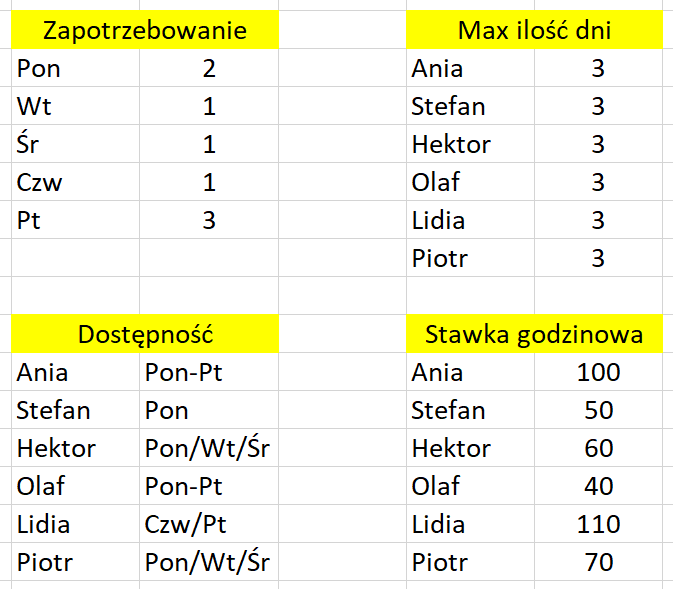




In [5]:
prob = LpProblem("Problem_grafiku", LpMinimize)

# poszczególne dni dla każdego pracownika zostały zdefiniowane jako osobne zmienne binarne
A_pon = LpVariable("Ania_pon", 0, None, LpBinary)
A_wt  = LpVariable("Ania_wt" , 0, None, LpBinary)
A_sr  = LpVariable("Ania_sr" , 0, None, LpBinary)
A_czw = LpVariable("Ania_czw", 0, None, LpBinary)
A_pt  = LpVariable("Ania_pt" , 0, None, LpBinary)

S_pon = LpVariable("Stefan_pon", 0, None, LpBinary)
S_wt  = LpVariable("Stefan_wt" , 0, None, LpBinary)
S_sr  = LpVariable("Stefan_sr" , 0, None, LpBinary)
S_czw = LpVariable("Stefan_czw", 0, None, LpBinary)
S_pt  = LpVariable("Stefan_pt" , 0, None, LpBinary)

H_pon = LpVariable("Hektor_pon", 0, None, LpBinary)
H_wt  = LpVariable("Hektor_wt" , 0, None, LpBinary)
H_sr  = LpVariable("Hektor_sr" , 0, None, LpBinary)
H_czw = LpVariable("Hektor_czw", 0, None, LpBinary)
H_pt  = LpVariable("Hektor_pt" , 0, None, LpBinary)

O_pon = LpVariable("Olaf_pon", 0, None, LpBinary)
O_wt  = LpVariable("Olaf_wt" , 0, None, LpBinary)
O_sr  = LpVariable("Olaf_sr" , 0, None, LpBinary)
O_czw = LpVariable("Olaf_czw", 0, None, LpBinary)
O_pt  = LpVariable("Olaf_pt" , 0, None, LpBinary)

L_pon = LpVariable("Lidia_pon", 0, None, LpBinary)
L_wt  = LpVariable("Lidia_wt" , 0, None, LpBinary)
L_sr  = LpVariable("Lidia_sr" , 0, None, LpBinary)
L_czw = LpVariable("Lidia_czw", 0, None, LpBinary)
L_pt  = LpVariable("Lidia_pt" , 0, None, LpBinary)

P_pon = LpVariable("Piotr_pon", 0, None, LpBinary)
P_wt  = LpVariable("Piotr_wt" , 0, None, LpBinary)
P_sr  = LpVariable("Piotr_sr" , 0, None, LpBinary)
P_czw = LpVariable("Piotr_czw", 0, None, LpBinary)
P_pt  = LpVariable("Piotr_pt" , 0, None, LpBinary)

  # obliczanie kosztów związanych z zatrudnieniem pracowników
prob += 100 * 4 * (A_pon + A_wt + A_sr + A_czw + A_pt) + 50 * 4 * (S_pon + S_wt + S_sr + S_czw + S_pt) + 60 * 4 * (H_pon + H_wt + H_sr + H_czw + H_pt) + 40 * 4 * (O_pon + O_wt + O_sr + O_czw + O_pt) + 110 * 4 * (L_pon + L_wt + L_sr + L_czw + L_pt) + 70 * 4 * (P_pon + P_wt + P_sr + P_czw + P_pt), "Koszt pracownikow"

  # zapotrzebowanie na pracowników
prob += A_pon + S_pon + H_pon + O_pon + L_pon + P_pon == 2, "Zapotrzebowanie pon"
prob += A_wt + S_wt + H_wt + O_wt + L_wt + P_wt == 1, "Zapotrzebowanie wt"
prob += A_sr + S_sr + H_sr + O_sr + L_sr + P_sr == 1, "Zapotrzebowanie sr"
prob += A_czw + S_czw + H_czw + O_czw + L_czw + P_czw == 1, "Zapotrzebowanie czw"
prob += A_pt + S_pt + H_pt + O_pt + L_pt + P_pt == 3, "Zapotrzebowanie pt"

  # Ograniczenia pracowników
prob += S_wt  + S_sr + S_czw + S_pt == 0, "Stefan tylko w pon"
prob += H_czw + H_pt == 0, "Hektor tylko w pon wt sr"
prob += L_pon + L_wt + L_sr == 0, "Lidia tylko w czw pt"
prob += P_czw + P_pt == 0, "Piotr tylko w pon wt sr"

  # 1 pracownik max 3x w tyg
prob += A_pon + A_wt + A_sr + A_czw + A_pt <= 3, "Max Ania"
prob += S_pon + S_wt + S_sr + S_czw + S_pt <= 3, "Max Stefan"
prob += H_pon + H_wt + H_sr + H_czw + H_pt <= 3, "Max Hektor"
prob += O_pon + O_wt + O_sr + O_czw + O_pt <= 3, "Max Olaf"
prob += L_pon + L_wt + L_sr + L_czw + L_pt <= 3, "Max Lidia"
prob += P_pon + P_wt + P_sr + P_czw + P_pt <= 3, "Max Piotr"


prob.solve()

print("Status: ", LpStatus[prob.status])

for v in prob.variables():
  print(v.name, "=",v.varValue)


Status:  Optimal
Ania_czw = 0.0
Ania_pon = 0.0
Ania_pt = 1.0
Ania_sr = 0.0
Ania_wt = 0.0
Hektor_czw = 0.0
Hektor_pon = 1.0
Hektor_pt = 0.0
Hektor_sr = 1.0
Hektor_wt = 0.0
Lidia_czw = 0.0
Lidia_pon = 0.0
Lidia_pt = 1.0
Lidia_sr = 0.0
Lidia_wt = 0.0
Olaf_czw = 1.0
Olaf_pon = 0.0
Olaf_pt = 1.0
Olaf_sr = 0.0
Olaf_wt = 1.0
Piotr_czw = 0.0
Piotr_pon = 0.0
Piotr_pt = 0.0
Piotr_sr = 0.0
Piotr_wt = 0.0
Stefan_czw = 0.0
Stefan_pon = 1.0
Stefan_pt = 0.0
Stefan_sr = 0.0
Stefan_wt = 0.0
